# 查看H5数据集的图片

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


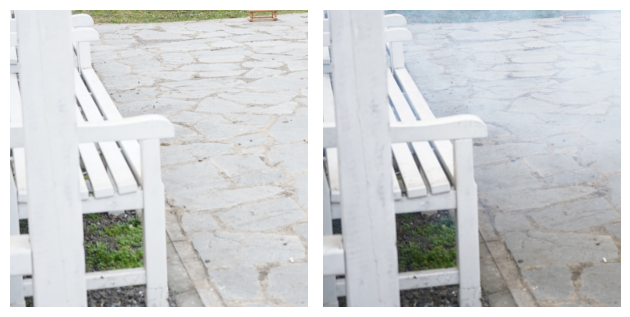

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


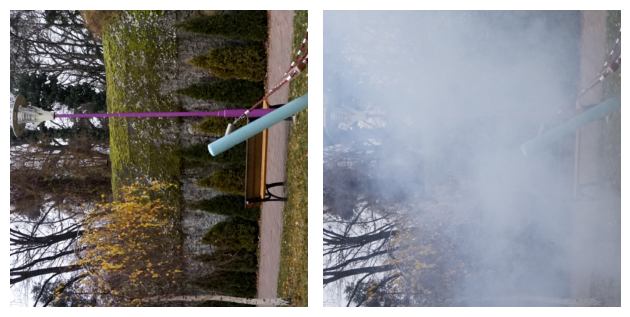

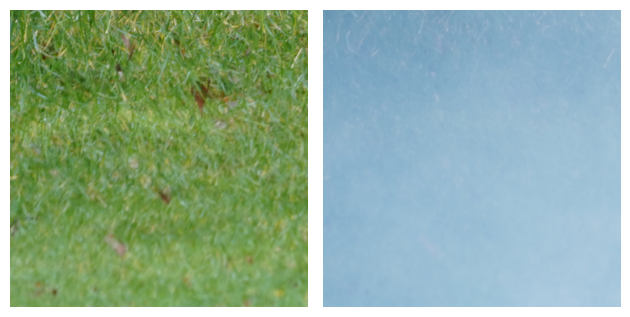

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


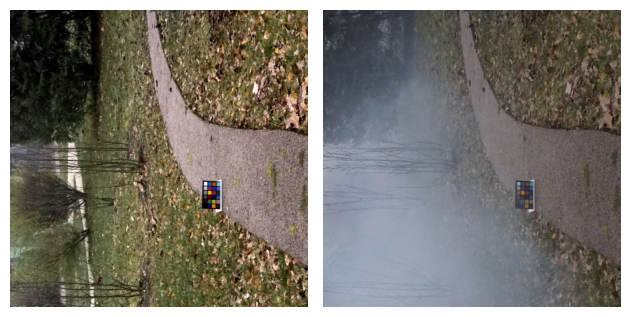

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


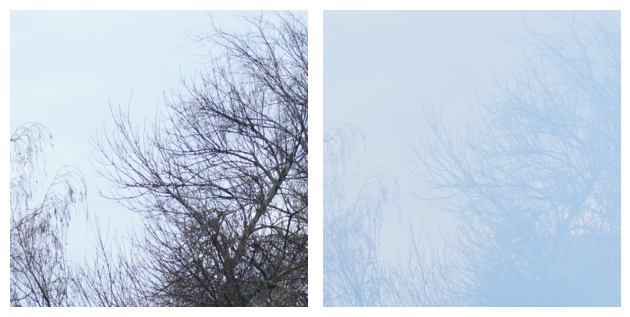

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


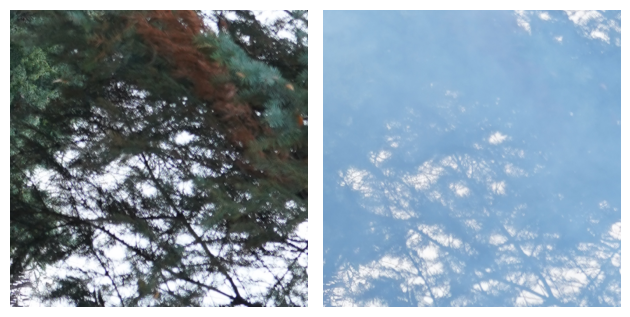

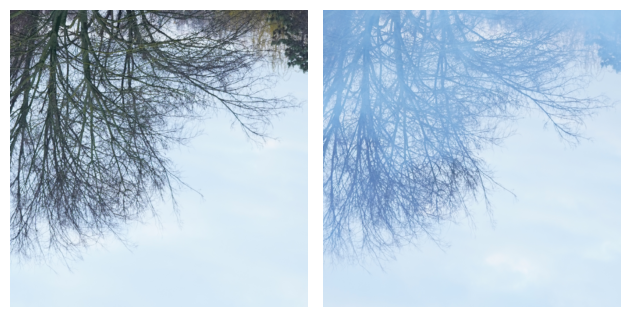

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


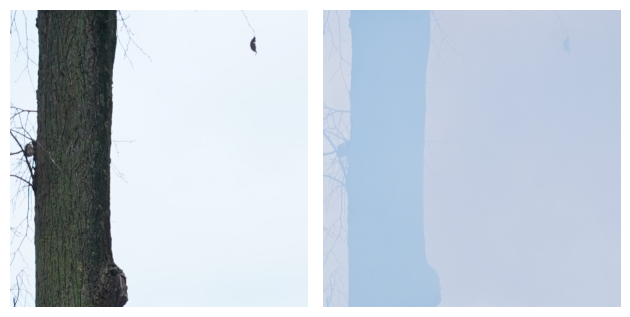

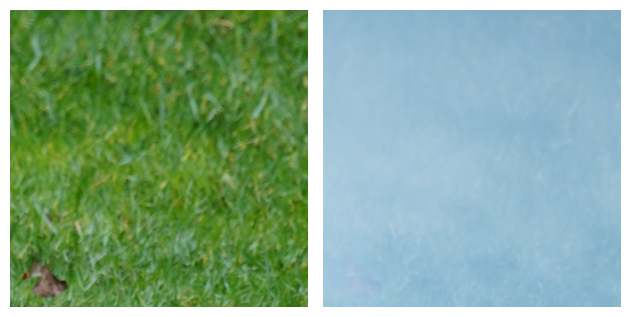

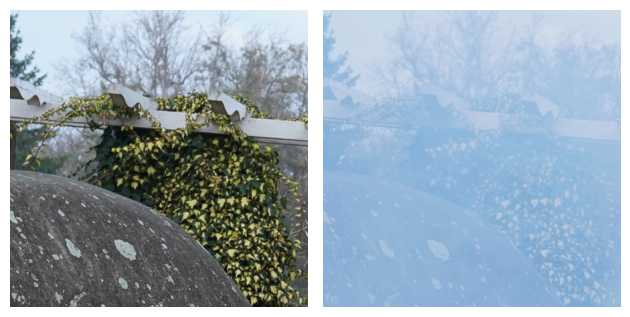

In [1]:
import matplotlib.pyplot as plt
import torch
import random
import numpy as np
import h5py

h5f = h5py.File("../datasets/NH-HAZE-20-21-23.h5", 'r')
images = []
keys = list(h5f.keys())
selected_keys = random.sample(keys, 10)
for key in selected_keys:
    img_data = np.array(h5f[key])
    gt = torch.Tensor(img_data[0]).squeeze().permute(1, 2, 0)
    haze = torch.Tensor(img_data[1]).squeeze().permute(1, 2, 0)
    images.append(gt)
    images.append(haze)

for i in range(len(selected_keys)):
    fig, axs = plt.subplots(1, 2)
    for j, ax in enumerate(axs.flat):
        ax.imshow(images[i * 2 + j])
        ax.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, top=0.7)
    plt.tight_layout()
    plt.show()
h5f.close()

# 查看图片形状并查看裁剪后的图片形状

In [54]:
from basicsr.data.create_h5_dataset import img_to_patches
from PIL import Image
import cv2

img = np.array(Image.open("D://DeepLearning//dataset//I-HAZE//hazy//20_indoor_hazy.jpg")) / 255
print(img.shape)
img = cv2.resize(img, (0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
print(img.shape)
img = img_to_patches(img.transpose(2, 0, 1), 256, 250)
print(img.shape)

(2833, 4657, 3)
(567, 931, 3)
(3, 256, 256, 12)


In [39]:
from torch.utils.data import DataLoader
import random
from torch.utils import data

opt = {
    "data_path": "../datasets/NH-Haze20-21-23.h5",
    "shuffle": True
}

class NtireH5Dataset(data.Dataset):
    def __init__(self, opt):
        super(NtireH5Dataset, self).__init__()
        self.opt = opt
        self.data_path = opt["data_path"]
        h5f = h5py.File(self.data_path, 'r')
        self.keys = list(h5f.keys())
        if opt["shuffle"]:
            random.shuffle(self.keys)
        h5f.close()

    def __getitem__(self, index):
        h5f = h5py.File(self.data_path, 'r')
        key = self.keys[index]
        img_data = np.array(h5f[key])
        h5f.close()
        return {
            "gt": torch.Tensor(img_data[0]).squeeze(),
            "lq": torch.Tensor(img_data[1]).squeeze(),
            "gt_path": self.data_path + "/" + key + ".jpg",
            "lq_path": self.data_path + "/" + key + ".jpg",
        }

    def __len__(self):
        return len(self.keys)

dataset = DataLoader(dataset=NtireH5Dataset(opt), num_workers=0, batch_size=1, shuffle=True)
print(len(dataset))

1280


In [40]:
import os.path as osp
for i, data in enumerate(dataset):
    print(data["gt"].shape)
    print(data["gt_path"])
    print(data["lq"].shape)
    print(data["lq_path"])
    print(osp.splitext(osp.basename(data['gt_path'][0]))[0])
    break

torch.Size([1, 3, 256, 256])
['../datasets/NH-Haze20-21-23.h5/20.jpg']
torch.Size([1, 3, 256, 256])
['../datasets/NH-Haze20-21-23.h5/20.jpg']
20


In [45]:
import os

os.listdir("D://DeepLearning//dataset//I-HAZE//clean")

['01_indoor_GT.jpg',
 '02_indoor_GT.jpg',
 '03_indoor_GT.jpg',
 '04_indoor_GT.jpg',
 '05_indoor_GT.jpg',
 '06_indoor_GT.jpg',
 '07_indoor_GT.jpg',
 '08_indoor_GT.jpg',
 '09_indoor_GT.jpg',
 '10_indoor_GT.jpg',
 '11_indoor_GT.jpg',
 '12_indoor_GT.jpg',
 '13_indoor_GT.jpg',
 '14_indoor_GT.jpg',
 '15_indoor_GT.jpg',
 '16_indoor_GT.jpg',
 '17_indoor_GT.jpg',
 '18_indoor_GT.jpg',
 '19_indoor_GT.jpg',
 '20_indoor_GT.jpg',
 '21_indoor_GT.jpg',
 '22_indoor_GT.jpg',
 '23_indoor_GT.jpg',
 '24_indoor_GT.jpg',
 '25_indoor_GT.jpg',
 '31_indoor_GT.jpg',
 '32_indoor_GT.jpg',
 '33_indoor_GT.jpg',
 '34_indoor_GT.jpg',
 '35_indoor_GT.jpg']

In [77]:
import pyiqa
fid = pyiqa.create_metric("fid")
fid("../examples/", "../results/")

C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loading pretrained model Inception3 from C:\Users\earthyzinc\.cache\torch\hub\checkpoints\pt_inception-2015-12-05-6726825d.pth
compute FID between two folders
Found 37 images in the folder ../examples/


FID : 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]


Found 37 images in the folder ../results/


FID : 100%|██████████| 2/2 [00:06<00:00,  3.01s/it]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\earthyzinc\AppData\Local\Temp\ipykernel_70584\2177567246.py", line 3, in <module>
    fid("../examples/", "../results/")
  File "C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\torch\nn\modules\module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\torch\nn\modules\module.py", line 1527, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\pyiqa\models\inference_model.py", line 67, in forward
    output = self.net(target.to(self.device), ref.to(self.device))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^